In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movie-reviews/IMDB Dataset.csv


**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

**DATA CLEANING**

In [4]:
Data = pd.read_csv('/kaggle/input/imdb-movie-reviews/IMDB Dataset.csv')

In [5]:
Data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
Data.shape

(50000, 2)

In [7]:
Data.isnull().sum()

review       0
sentiment    0
dtype: int64

The above cell's output shows that there are no missing or null values in our data.

In [8]:
Data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

Thus, this is a binary classification problem as our target variable i.e.**sentiment** has only two outcomes - **positive** and **negative**

In [11]:
Data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

This shows that our data consist of equal number of outputs for both the classes of target variable. This ensures that our model training is not biased and gives optimized prediction.

**DATA PROCESSING**

In [9]:
Data['sentiment'].replace(['positive','negative'],[1,0],inplace = True)

Converting categorical variables (**positive and negative**) into numeric values (**1 and 0**) respectively.

In [10]:
Data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


The below two codes are executed two get more information about the reviews in our data like how many characters are there, or how many words are there in a single review.

In [12]:
Data['no_of_char'] = Data['review'].apply(len)

In [13]:
Data['no_of_words'] = Data['review'].apply(lambda x:len(str(x).split()))

In [14]:
Data.head()

,review,sentiment,no_of_char,no_of_words
0,One of the other reviewers has mentioned that ...,1,1761,307
1,A wonderful little production. <br /><br />The...,1,998,162
2,I thought this was a wonderful way to spend ti...,1,926,166
3,Basically there's a family where a little boy ...,0,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,230


In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
Data['no_of_sentences'] = Data['review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

The above code is executed to know how many sentences are there in a single review.

In [17]:
Data.head()

,review,sentiment,no_of_char,no_of_words,no_of_sentences
0,One of the other reviewers has mentioned that ...,1,1761,307,10
1,A wonderful little production. <br /><br />The...,1,998,162,7
2,I thought this was a wonderful way to spend ti...,1,926,166,4
3,Basically there's a family where a little boy ...,0,748,138,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,230,9


The below code will tell us the review which has the least words. I am doing so beacause in upcoming line of codes, I will perform various techniques of NLP like stemming, remval of stopwords etc. To make it easy to understand, i am choosing a sentence with least words.

In [18]:
Data.sort_values(by=['no_of_words']).head()

,review,sentiment,no_of_char,no_of_words,no_of_sentences
28920,Primary plot!Primary direction!Poor interpreta...,0,51,4,1
27521,"Read the book, forget the movie!",0,32,6,1
40817,I hope this group of film-makers never re-unites.,0,49,8,1
13109,"More suspenseful, more subtle, much, much more...",0,61,8,1
31072,"What a script, what a story, what a mess!",0,41,9,1


In [19]:
Data['review'][28920]

'Primary plot!Primary direction!Poor interpretation.'

In [20]:
feedback = re.sub('[^a-zA-Z]',' ',Data['review'][28920])

In [21]:
feedback

'Primary plot Primary direction Poor interpretation '

In [22]:
feedback = feedback.lower()
feedback

'primary plot primary direction poor interpretation '

In [23]:
feedback = feedback.split()
feedback

['primary', 'plot', 'primary', 'direction', 'poor', 'interpretation']

In [24]:
from nltk.corpus import stopwords
st_words = stopwords.words("english")
st_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
feedback = [word for word in feedback if word not in set(st_words)]
feedback

['primary', 'plot', 'primary', 'direction', 'poor', 'interpretation']

In [26]:
st_words.remove('not')

In [27]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
feedback = [ps.stem(word) for word in feedback]
feedback = " ".join(feedback)
feedback

'primari plot primari direct poor interpret'

In [29]:
neg_st_words = {"don't",
    "aren't",
    "can't",
    "couldn't",
    "didn't",
    "doesn't",
    "isn't",
    "won't",
    "wasn't",
    "weren't",
    "wouldn't",
    "hasn't",
    "haven't",
    "hadn't",
    "shouldn't",
    "mustn't",
    "shan't",
    "n't",
    "no",
    "nor",
    "never",
    "none",
    "nothing",
    "nowhere"}

In [30]:
st_words = set(st_words) - neg_st_words
st_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 "needn't",
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "th

In [31]:
corpus=[]
for i in range(0, 50000):
    feedback = re.sub('[^a-zA-Z]', ' ', Data['review'][i])
    feedback = feedback.lower()
    feedback = feedback.split()
    feedback = [ps.stem(word) for word in feedback if word not in st_words]
    feedback = ' '.join(feedback)
    corpus.append(feedback) 

In [32]:
Data['processed_txt'] = corpus
Data.head()

,review,sentiment,no_of_char,no_of_words,no_of_sentences,processed_txt
0,One of the other reviewers has mentioned that ...,1,1761,307,10,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,1,998,162,7,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,1,926,166,4,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,748,138,6,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,230,9,petter mattei love time money visual stun film...


In [33]:
from wordcloud import WordCloud 
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="black")

In [34]:
pos_fb = wc.generate(Data[Data['sentiment']==1]['processed_txt'].str.cat(sep=" "))

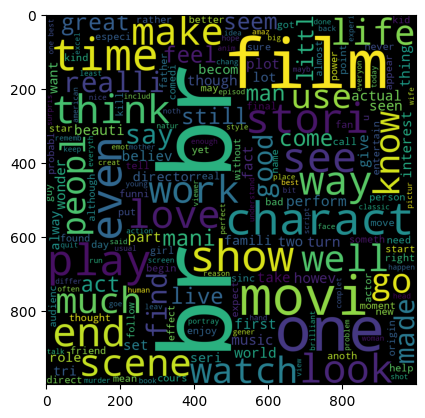

In [35]:
plt.imshow(pos_fb)

In [36]:
neg_fb = wc.generate(Data[Data['sentiment']==0]['processed_txt'].str.cat(sep=" "))

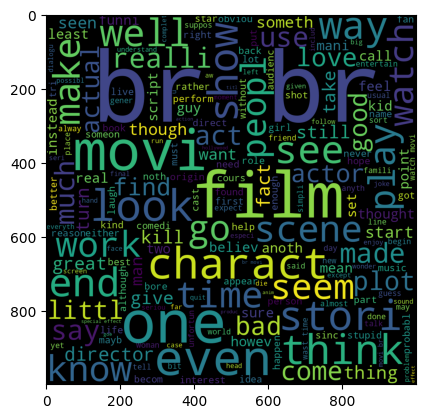

In [37]:
plt.imshow(neg_fb)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 8000)

In [39]:
x = cv.fit_transform(corpus).toarray()

In [40]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
y = Data['sentiment']
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [42]:
 from sklearn.model_selection import train_test_split

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 11)

In [45]:
from sklearn.naive_bayes import GaussianNB 

In [46]:
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)

In [47]:
nb_accuracy = accuracy_score(y_test,nb_pred)*100
nb_accuracy

70.36

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [50]:
lr_accuracy = accuracy_score(y_test,lr_pred)*100
lr_accuracy

88.17

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [53]:
rf_accuracy = accuracy_score(y_test,rf_pred)*100
rf_accuracy

85.61